## 4.2.1 오차제곱합

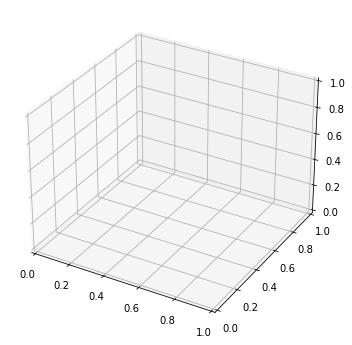

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (9, 6))
ax = fig.add_subplot(111, projection="3d")

In [7]:
def sum_squares_error(y, t):
    y = np.array(y)
    t = np.array(t)
    return 0.5 * np.sum((y - t) ** 2)

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] #인덱스 별로 가능성을 출력함. (softmax)
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(np.sum(y)) #softmax로 출력한 값이기 때문에 총합이 1이다.
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #정답 인덱스를 one-hot-encoding 함.

print(sum_squares_error(y, t))
print(sum_squares_error(y2, t)) #y2에서 정답 인덱스의 정답 가능성이 작게 나왔기 때문에 y에 비해 큰 오차가 발생하였다.

1.0
0.09750000000000003
0.5975


## 4.2.2 교차 엔트로피 오차

In [8]:
delta = 0.0001

def cross_entropy_error(y, t):
    y = np.array(y)
    t = np.array(t)
    return -np.sum(t * np.log(y + delta)) #np.log를 계산할 때 0이 입력되면 -inf가 되어 계산이 불가능하기 때문에, 아주 작은 값인 delta를 더해준다.

print(cross_entropy_error(y, t))
print(cross_entropy_error(y2, t))

0.5106589709866699
2.301585592660962


## 4.2.3 미니배치 학습

In [9]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True, flatten=True)

print(x_test.shape, x_train.shape, t_test.shape, t_train.shape)

(10000, 784) (60000, 784) (10000, 10) (60000, 10)


### 훈련 데이터에서 무작위로 10장 빼내기

In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) #0 이상 train_size(60000) 미만의 수 중에서 무작위로 batch_size(10)개를 골라낸다.
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

[55529 51668  9178  7114 58713 51728  7166 52644  3785 26928]


### 미니배치용 교차 엔트로피 오차 (one-hot-encoding)

In [11]:
def cross_entropy_error(y, t):
    y = np.array(y)
    t = np.array(t)
    if y.ndim == 1: #y가 1차원이라면
        t = t.reshape(1, t.size) #t를 (1, t.size)로 크기 변경.
        y = y.reshape(1, y.size) #y를 (1, y.size)로 크기 변경.

    print(y.shape, t.shape)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size #배치의 크기로 나누어 정규화하고 이미지 한 장당 평균의 교차 엔트로피 오차를 계산한다.

print(cross_entropy_error(y, t))

(1, 10) (1, 10)
0.510825457099338


### 미니배치용 교차 엔트로피 오차 (non one-hot-encoding)

In [12]:
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size #batch_size = 5이고 t = [2, 7, 0, 9, 4] 일 때, y[np.arange(batch_size), t]는 y[0, 2], y[1, 7], y[2, 0], y[3, 9], y[4, 4]인 넘파이 배열을 생성한다.

### 수치 미분

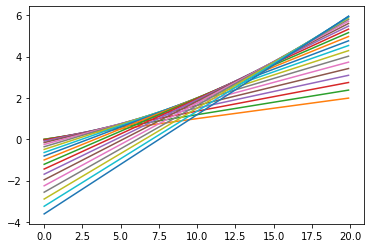

In [13]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)

def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

x = np.arange(0, 20, 0.1)
y = function_1(x)

plt.plot(x, y)

def tangent_line(f, t):
    X = np.arange(0, 20, 0.1)
    Y = numerical_diff(f, t) * (X - t) + f(t)
    plt.plot(X, Y)

for i in range(0, 20, 1):
    tangent_line(function_1, i)

plt.show()


### 그림 4-8

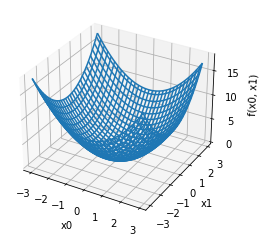

In [14]:
def function_2(x, y):
    return x ** 2 + y ** 2

fig = plt.figure()
ax = plt.axes(projection= '3d')
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x_m, y_m = np.meshgrid(x, y)

z = function_2(x_m, y_m)

ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_zlabel("f(x0, x1)")

ax.plot_wireframe(x_m, y_m, z)

## 4.4 기울기

In [15]:
def function_3(x):
    return x[0] ** 2 + x[1] ** 2

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val

    return grad

print(numerical_gradient(function_3, np.array([3.0, 4.0])))

[6. 8.]


## 4.4.1 경사법(경사 하강법)

In [16]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [17]:
init_x = np.array([-3., 4.]) #(-3, 4)에서 시작하겠다.
print(gradient_descent(function_3, init_x, lr=0.1)) #학습률이 적당한 예: 거의 0에 가까운 결과를 보여줌.

init_x = np.array([-3., 4.])
print(gradient_descent(function_3, init_x=init_x, lr=10.0)) #학습률이 너무 큰 예: 큰 값으로 발산해버림.
print(gradient_descent(function_3, init_x=init_x, lr=1e-10)) #학습률이 너무 작은 예: 큰 값으로 발산해버림.

[-6.11110793e-10  8.14814391e-10]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]


## 4.4.2 신경망에서의 기울기

In [18]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        y = self.predict(x)
        z = softmax(y)
        loss = cross_entropy_error(z, t)

        return loss

In [19]:
net = simpleNet()
print(net.W)

[[-0.85461076 -0.183642    0.21655101]
 [ 0.33164532 -0.47129937 -1.29459884]]


In [20]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.21428567 -0.53435463 -1.03520835]


In [21]:
np.argmax(p)
t = np.array([0, 0, 1])
net.loss(x, t)

1.5938617778510964

In [22]:
f = lambda w: net.loss(x, t) #매개변수 w를 갖는 람다함수.
dW = numerical_diff(f, net.W)

## 4.5.1 2층 신경망 클래스 구현하기

In [23]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y==t) / float(x.shape[0])

        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])

        return grads

In [24]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

print(net.params["W1"].shape, net.params["W2"].shape, net.params["b1"].shape, net.params["b2"].shape)

(784, 100) (100, 10) (100,) (10,)


## 4.5.2 미니배치 학습 구현하기

### (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
1. mnist 데이터셋 불러와서 x_train, t_train, x_test, t_test로 나누기.
2. train_size = x_train의 데이터 개수. (x_train의 행 개수)
### TwoLayerNet 클래스 호출.
3. network를 TwoLayerNet으로 초기화 한다. (input_size = 한 이미지의 데이터 크기 / hidden_size = 중간 노드 수 / output_size = 카테고리 수)
### 학습 루프.
4. iter_nums만큼 반복하며
### batch 만들기.
5. x_train의 데이터 개수 (60000개) 중에서 batch_size만큼의 수를 랜덤으로 뽑아서 batch_mask에 저장한다.
6. x_batch, t_batch는 batch_size 만큼 선택된 집합.
7. TwoLayerNet에 만들어놓은 numerical_gradient 함수를 호출한다.
### grad = network.numerical_gradient(x_batch, t_batch)
8. numerical_gradient에서는 loss 함수를 호출한다.
9. loss에서는 x(입력 데이터)와 t(정답 레이블)을 가지고 predict를 한 다음(계산 결과: y) cross_entropy_error(y, t) (계산 결과: loss_W로 반환)를 계산한다.
10. 그 다음 numerical_gradient(loss_W, W1) - loss_W 함수에서 W1에서의 그래디언트를 구한다.
11. W2, b1, b2에 대해 모두 그래디언트를 구한다.
12. 모든 그래디언트를 grad로 반환한다.
### 모든 매개변수에 대해 그래디언트와 학습률을 고려하여 갱신한다.
13. 모든 매개변수에 대해 루프를 돌며 (매개변수) - (학습률) * (그래디언트) 를 계산하여 매개변수를 갱신한다.
14. 갱신한 매개변수를 사용하여 loss를 새로 구하고 기록한다.

In [30]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=x_train.shape[1], hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    for key in ("W1", 'b1', "W2", 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

print(train_loss_list)

[2.288153679082927, 2.293690562231945, 2.294733203377659, 2.2862327448570676, 2.2871448370939205, 2.2953358645543562, 2.2793238648620937, 2.291721917563986, 2.287645344058961, 2.282807468436541]


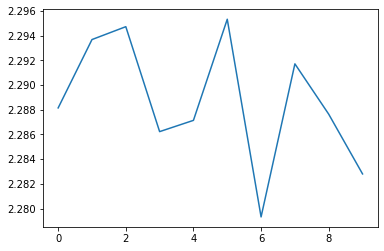

(100, 784)
(784, 50)
(50,)


In [42]:
import matplotlib.pyplot as plt

x = np.arange(0, 10)
y = train_loss_list

plt.plot(x, y)
plt.show()

print(x_batch.shape) # 미니 배치 데이터의 shape.
print(network.params["W1"].shape) # 미니 배치 데이터의 W shape.
print(network.params["W1"][783].shape) # 784번째 이미지 데이터의 W shape.

In [52]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size = x_train.shape[1], hidden_size=50, output_size=10)

iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch, t_batch = x_train[batch_mask], t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | "+str(train_acc)+", "+str(test_acc))

train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.0986, 0.0958


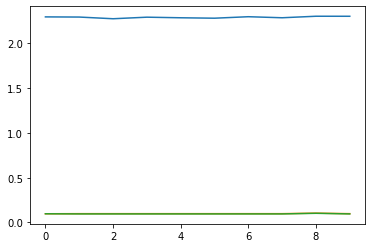

In [53]:
x = np.arange(0, 10)

plt.plot(x, train_loss_list)
plt.plot(x, train_acc_list)
plt.plot(x, test_acc_list)

plt.show()